# FFT of Vieux Paris

In [483]:
%load_ext autoreload
%autoreload 2

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import read_wave
from thinkdsp import decorate

import numpy as np
import matplotlib.pyplot as plt

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read and play

In [477]:
wave = {}
wave["Salomon_G"] = read_wave('/Users/msfr/Dropbox/Violin Physics/violin_fft/violins/Salomon/G.wav')
wave["Mirecourt_Strad_G"] = read_wave('/Users/msfr/Dropbox/Violin Physics/violin_fft/violins/Mirecourt Stradivarius/G.wav')
wave["Mirecourt_Strad_D"] = read_wave('/Users/msfr/Dropbox/Violin Physics/violin_fft/violins/Mirecourt Stradivarius/D.wav')

## Cut wave

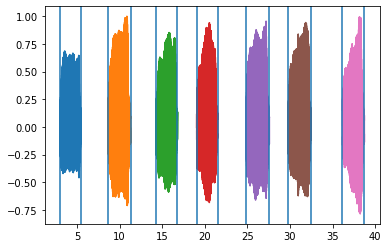

In [478]:
wave_tmp = wave["Mirecourt_Strad_D"]
t_dict = wave_cut(wave_tmp, 0.5, 0.75)
nb_sample = t_dict["nb_interval"]

segment = {}
for i in range(t_dict["nb_interval"]):
    segment[i] = wave_tmp.segment(t_dict["start"][i], t_dict["end"][i] - t_dict["start"][i])

for i in range(t_dict["nb_interval"]):
    segment[i].plot()
    
for t in t_dict["start"]:
    plt.axvline(t)

for t in t_dict["end"]:
    plt.axvline(t)

## Compute & compare spectrum

In [480]:
spec = {}
for k in wave.keys():
    spec[k] = violin_spec(wave[k], fmin=20, fmax=2000)

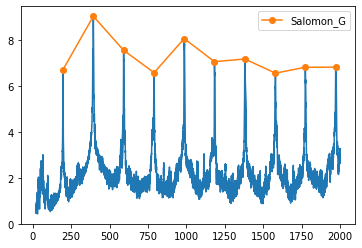

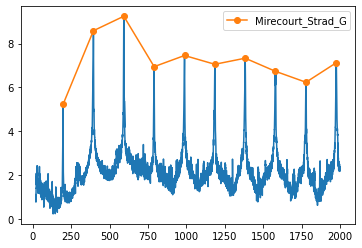

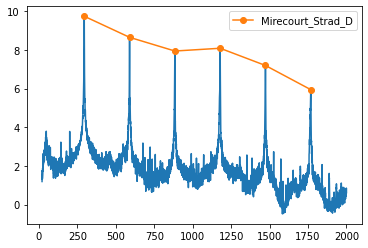

In [486]:
for k in wave.keys():
    f,a = peak(spec[k], thr=-0.15)
    plt.figure()
    plt.plot(spec[k]["fs"], np.log(spec[k]["amps"]))
    plt.plot(f, np.log(a), 'o-', label=k)
    plt.legend()